XGBoost

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.4 MB/s eta 0:00:00


Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

Data Preprocessing

In [ ]:
# Load the data and inspect the target variable
df = pd.read_csv('Data.csv')
print(df['Class'].unique())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)



[2 4]


Importing Dataset

In [ ]:
df = pd.read_csv('Data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Splitting the dataset into the training and test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training XGBoost on the training

In [ ]:
# Check the unique values in the training target variable
print(np.unique(y_train))

[2 4]


In [ ]:
import numpy as np
y_train = np.where(y_train == 2, 0, 1)

In [ ]:
classifier = XGBClassifier()
xg = classifier.fit(x_train, y_train)

Making cofusion matrix

In [ ]:
y_pred = xg.predict(x_test)
y_pred = np.where(y_pred == 0, 2, 4)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85  2]
 [ 1 49]]


0.9781021897810219

Visualizing Confusion matrix

In [ ]:
!pip install seaborn
import seaborn as sns

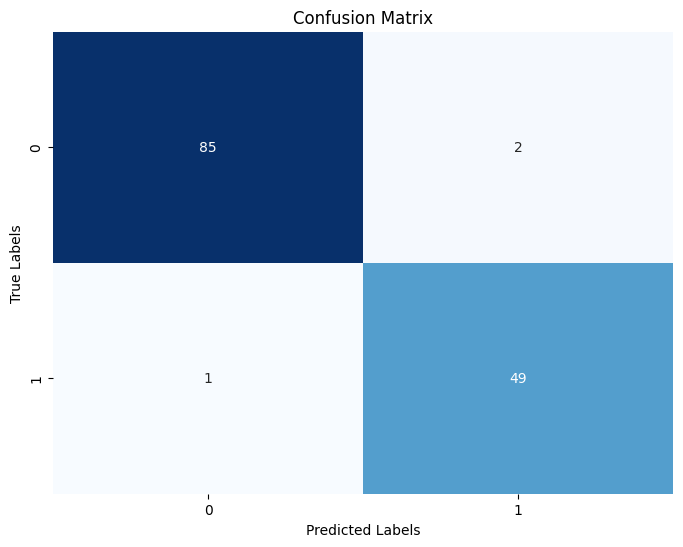

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Applying K-fold cross validation

In [ ]:
accuracy_score  = cross_val_score(estimator=xg, X=x_train, y=y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuracy_score.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracy_score.std()*100))

Accuracy: 96.71 %
Standard Deviation: 2.28 %
